# **Abstract**

The "Motor Vehicle Collisions - Crashes" dataset includes details about crash events that have occured in New York city since 2012. The dataset is updated weekly and contains information about the crash date, crash time, zipcode, latitude, longitude, street names of each crash. Additionally, the dataset includes details such as the number of pedestrians, cyclists, or motorists who have been injured, contributing factors of each veichle causing the crash, and the types of veichles causing the crash. This dataset is important because it can help state government agencies, researchers, and transportation planners develop strategies to help improve traffic safety in other large cities in the US. Additionally, this dataset can be useful for veichle manufacturers who can update a veichle's safety features based on the types of crashes and veichles most involved in the crashes.

#**Raw Data Source**

https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

#**Project Goals**

 The goal of this project is to analyze the causes of crahses in New York City, and based on that analysis build three machine learning models, to accurately predict the number of persons killed in New York City, which will provide insights for future city planners that could help improve traffic safety in other large cities, to prevent these deaths.

 We aim to achieve this goal by performing the following steps:

 * Data Collection
 * Data Cleaning and Preprocessing
 * Data Visulaization
 * Exploratory Data Analysis
 * Machine Learning Models








# Problem Statement

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to the General Services Administration (GSA), there is "an average of 6.4 million car crashes occur in the U.S. each year" (*What are the odds*, 2024). Of those, there are approximately 43,000 fatal crashes that occur yearly in the US (Moore & Gollub, 2024). Moreover, major American cities, such as New York City, have a 20% relative collision likelihood (Bieber & Ramirez, 2023). These statistics are concering because car crashes have been shown to cause a large number of deaths and injuries, many of which could have been prevented. Thus, the goal of this data science project is to analyze vehicle crashes in a New York City to gain an understanding as to why there are many collisions and car crashes that could be occuring in major US cities. Based on this analysis, the project will also consist of an evaluation of three machine learning models to determine which one can accurately predict the number of persons killed in New York City. This analysis and modeling will be useful for future urban planning and policies, such as enforced speed limits, all of which can help reduce the number of deaths caused by vehicle crahses and collisions.

# Introduction

Vehicle collisions and crashes are a significant concern in urban areas, particularly in densely populated cities like New York City. According to the General Services Administration (GSA), an average of 6.4 million car crashes occur in the U.S. each year, with approximately 43,000 fatal crashes annually. Major American cities, such as New York City, have a 20% relative collision likelihood. These statistics highlight the urgent need to understand the factors contributing to these incidents to develop effective strategies for improving traffic safety.

# Data Ingestion

The purpose of this step was to load the dataset into Google Colab and observe the given data in the dataset to determine next steps for data cleaning. In this step, we identified the names of each feature as well as their datatypes. Additionally, we determined whether null values exist in the dataset, which will be later processed in the data cleaning stage.

The code block bellow imports the necessary libraries required for our data project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

The code block bellow allows the Drive to be mounted. This will make it eaiser to load the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code block bellow allows for the dataset to be loaded. More specifically, it reads a comma separated values file into a Dataframe.

In [ ]:
file_path = '/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes.csv'
df = pd.read_csv(file_path)

<ipython-input-49-33984e4d3fb3>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


To understand the dataset, we performed initial checks to identify the columns, their data types, and the presence of any null values:

The code block below checks the number of null values in each column.

In [ ]:
print(df.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           658553
ZIP CODE                          658813
LATITUDE                          245044
LONGITUDE                         245044
LOCATION                          245044
ON STREET NAME                    452650
CROSS STREET NAME                 805794
OFF STREET NAME                  1757066
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7069
CONTRIBUTING FACTOR VEHICLE 2     331201
CONTRIBUTING FACTOR VEHICLE 3    1965262
CONTRIBUTING FACTOR VEHICLE 4    2082877
CONTRIBUTING FACTOR VEHICLE 5    2107973
COLLISION_ID                           0
VEHICLE TYPE COD

The code block below checks the number of non-null values in each column.

In [ ]:
print(df.notnull().sum())

CRASH DATE                       2117343
CRASH TIME                       2117343
BOROUGH                          1458790
ZIP CODE                         1458530
LATITUDE                         1872299
LONGITUDE                        1872299
LOCATION                         1872299
ON STREET NAME                   1664693
CROSS STREET NAME                1311549
OFF STREET NAME                   360277
NUMBER OF PERSONS INJURED        2117325
NUMBER OF PERSONS KILLED         2117312
NUMBER OF PEDESTRIANS INJURED    2117343
NUMBER OF PEDESTRIANS KILLED     2117343
NUMBER OF CYCLIST INJURED        2117343
NUMBER OF CYCLIST KILLED         2117343
NUMBER OF MOTORIST INJURED       2117343
NUMBER OF MOTORIST KILLED        2117343
CONTRIBUTING FACTOR VEHICLE 1    2110274
CONTRIBUTING FACTOR VEHICLE 2    1786142
CONTRIBUTING FACTOR VEHICLE 3     152081
CONTRIBUTING FACTOR VEHICLE 4      34466
CONTRIBUTING FACTOR VEHICLE 5       9370
COLLISION_ID                     2117343
VEHICLE TYPE COD

The code block below check the datatypes of each column.

In [ ]:
print(df.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

# Data Cleaning

The purpose of the data cleaning step is to remove and fix null values and potential outliers in our dataset. This will help with a more accurate data analysis later on.

Duplicate Removal: Duplicate rows were identified and removed to ensure data integrity and avoid redundancy.

In [ ]:
#Drop duplicate rows
df = df.drop_duplicates()

Identification: Initially, we identified columns with missing values. Significant columns with missing data included 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', and 'LOCATION'.

Standerized Formats: We standardized the formats of date and time columns to ensure consistency.

Extracted Coordinates: For the 'LOCATION' column, we extracted latitude and longitude values and converted them to numeric types

Imputation: Missing values in categorical columns such as 'BOROUGH' were filled with 'Unknown', while numeric columns like 'ZIP CODE' were filled with 0. For 'LATITUDE' and 'LONGITUDE', missing values were also filled with 0 to maintain consistency, as seen in the 2 code blocks below.

The code block below fills in numerical values that are null with 0, if there are any. The code block also converts certain features to pandas datetime objects. For example, the crash time will be formatted as the hour and minute for when crashes occur. Meanwhile, other features such as 'Latitude' and 'Longitude' will be converted to numerical values.

In [ ]:
# Handle missing values
df.fillna({'BOROUGH': 'Unknown', 'ZIP CODE': 0}, inplace=True)

# Standardize formats
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.time
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce')
# Ensure 'LOCATION' is a string and handle the split
def extract_coordinates(location):
    if isinstance(location, str) and '(' in location and ')' in location:
        coords = location[1:-1].split(', ')
        return float(coords[0]), float(coords[1])
    return None, None

df['LATITUDE'], df['LONGITUDE'] = zip(*df['LOCATION'].apply(extract_coordinates))

# Convert 'LATITUDE' and 'LONGITUDE' to numeric values
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Drop the original 'LOCATION' column
df.drop(columns=['LOCATION'], inplace=True)
df['BOROUGH'] = df['BOROUGH'].str.lower().str.strip()

The code block below replaces null values with 0 for numerical feature values, and 'Unknown' for categorical feature values.

In [ ]:
df.fillna({'LATITUDE': 0}, inplace = True)
df.fillna({'LONGITUDE': 0}, inplace = True)
df.fillna({'LOCATION': 0}, inplace = True)
df.fillna({'ON STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'CROSS STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'OFF STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'ON STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'CROSS STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'OFF STREET NAME': 'Unknown'}, inplace = True)
df.fillna({'NUMBER OF PERSONS INJURED': 0}, inplace = True)
df.fillna({'NUMBER OF PERSONS KILLED': 0}, inplace = True)

The purpose of the code block below was to determine unique values in the 'CONTRIBUTING FACTOR VEHICLE 1' feature to see if there are any inconsistent data values.

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Unspecified', nan, 'Passing Too Closely',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Turning Improperly', 'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited',
       'Failure to Yield Right-of-Way', 'Illnes', 'Lost Consciousness',
       'Brakes Defective', 'Backing Unsafely', 'Glare',
       'Passenger Distraction', 'Fell Asleep', 'Obstruction/Debris',
       'Tinted Windows', 'Animals Action', 'Drugs (illegal)',
       'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',


If there are, inconsistent values, they will be replaced. Inconsistent Value Replacement: Inconsistent values in the 'CONTRIBUTING FACTOR VEHICLE' columns were replaced with 'Unspecified,' where necessary.

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].replace(['1', '80'], 'Unspecified', inplace = True)

<ipython-input-57-58df972a402c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 1'].replace(['1', '80'], 'Unspecified', inplace = True)


These same two steps are repeated below for all 5 'CONTRIBUTING FACTOR VEHICLE' columns, wherever necessary.

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 2'].unique()

array(['Unspecified', nan, 'Other Vehicular',
       'Driver Inattention/Distraction', 'Traffic Control Disregarded',
       'Passing or Lane Usage Improper', 'Reaction to Uninvolved Vehicle',
       'Following Too Closely', 'Unsafe Speed',
       'Aggressive Driving/Road Rage', 'Turning Improperly',
       'Failure to Yield Right-of-Way', 'Driver Inexperience',
       'View Obstructed/Limited', 'Oversized Vehicle',
       'Passing Too Closely', 'Unsafe Lane Changing', 'Pavement Slippery',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fell Asleep', 'Backing Unsafely', 'Obstruction/Debris',
       'Alcohol Involvement', 'Outside Car Distraction',
       'Passenger Distraction', 'Steering Failure', 'Glare',
       'Vehicle Vandalism', 'Traffic Control Device Improper/Non-Working',
       'Tinted Windows', 'Tow Hitch Defective', 'Brakes Defective',
       'Pavement Defective', 'Failure to Keep Right',
       'Driverless/Runaway Vehicle', 'Drugs (illegal)', 'Fatig

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 2'].replace(['1', '80'], 'Unspecified', inplace = True)

<ipython-input-59-cae279e94c33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 2'].replace(['1', '80'], 'Unspecified', inplace = True)


In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 3'].unique()

array([nan, 'Unspecified', 'Passing or Lane Usage Improper',
       'Following Too Closely', 'Pavement Slippery', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Unsafe Lane Changing',
       'View Obstructed/Limited', 'Outside Car Distraction',
       'Reaction to Uninvolved Vehicle', 'Traffic Control Disregarded',
       'Failure to Yield Right-of-Way', 'Oversized Vehicle',
       'Obstruction/Debris', 'Unsafe Speed', 'Driver Inexperience',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'Passing Too Closely',
       'Aggressive Driving/Road Rage', 'Fell Asleep',
       'Pavement Defective', 'Turning Improperly',
       'Traffic Control Device Improper/Non-Working',
       'Driverless/Runaway Vehicle', 'Passenger Distraction',
       'Eating or Drinking', 'Lost Consciousness', 'Brakes Defective',
       'Backing Unsafely', 'Tire Failure/Inadequate',
       'Failure to Keep Right', 'Cell Phone (hands-free)',
       'Other Elec

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 3'].replace(['1', '80'], 'Unspecified', inplace = True)

<ipython-input-61-18a2a080abd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONTRIBUTING FACTOR VEHICLE 3'].replace(['1', '80'], 'Unspecified', inplace = True)


In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 4'].unique()

array([nan, 'Unspecified', 'Following Too Closely', 'Other Vehicular',
       'Reaction to Uninvolved Vehicle', 'Pavement Defective',
       'Pavement Slippery', 'Driver Inattention/Distraction',
       'Unsafe Lane Changing', 'Passing Too Closely',
       'Alcohol Involvement', 'Unsafe Speed', 'Driver Inexperience',
       'Outside Car Distraction', 'Traffic Control Disregarded',
       'View Obstructed/Limited', 'Fell Asleep',
       'Failure to Yield Right-of-Way', 'Aggressive Driving/Road Rage',
       'Passing or Lane Usage Improper', 'Brakes Defective',
       'Obstruction/Debris', 'Backing Unsafely', 'Animals Action',
       'Accelerator Defective', 'Drugs (illegal)',
       'Driverless/Runaway Vehicle', 'Turning Improperly',
       'Fatigued/Drowsy', 'Other Electronic Device',
       'Failure to Keep Right', 'Drugs (Illegal)', 'Physical Disability',
       'Illness', 'Lost Consciousness', 'Glare',
       'Prescription Medication', 'Steering Failure',
       'Traffic Control Dev

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 5'].unique()

array([nan, 'Unspecified', 'Other Vehicular',
       'Reaction to Uninvolved Vehicle', 'Pavement Slippery',
       'Following Too Closely', 'Driver Inattention/Distraction',
       'Passing Too Closely', 'Outside Car Distraction', 'Unsafe Speed',
       'Failure to Yield Right-of-Way', 'Alcohol Involvement',
       'Driver Inexperience', 'Obstruction/Debris', 'Pavement Defective',
       'Aggressive Driving/Road Rage', 'Tire Failure/Inadequate',
       'Drugs (illegal)', 'Passing or Lane Usage Improper', 'Fell Asleep',
       'Fatigued/Drowsy', 'Other Electronic Device',
       'Traffic Control Disregarded', 'Illness', 'Brakes Defective',
       'Glare', 'Failure to Keep Right', 'Steering Failure',
       'Backing Unsafely', 'Traffic Control Device Improper/Non-Working',
       'Oversized Vehicle'], dtype=object)

The code block below displays the rows where the 'CONTRIBUTING FACTOR VEHICLE 1' column is null ("NaN"). The reason for doing this is because if 'CONTRIBUTING FACTOR VEHICLE 1' column is null, the other 'CONTRIBUTING FACTOR VEHICLE' columns and 'VEHICLE TYPE CODE' column values were null, which could cause an inaccurate exploratory data analysis.

In [ ]:
df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'].isnull()] #display the rows where the 'CONTRIBUTING FACTOR VEHICLE 1' column is null ("NaN")

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
4,2021-12-14,08:13:00,brooklyn,11233.0,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,Unknown,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
121,2022-03-26,13:48:00,manhattan,10032.0,40.835037,-73.939790,Unknown,Unknown,1016 SAINT NICHOLAS AVENUE,1.0,...,NaN,NaN,NaN,NaN,4513565,NaN,NaN,NaN,NaN,NaN
384,2021-07-04,22:22:00,unknown,0.0,0.000000,0.000000,LAYTON AVENUE,THROGMORTAN AVENUE,Unknown,1.0,...,NaN,NaN,NaN,NaN,4456568,NaN,NaN,NaN,NaN,NaN
1689,2021-04-16,10:00:00,brooklyn,11234.0,40.619190,-73.923020,AVENUE N,EAST 54 STREET,Unknown,0.0,...,NaN,NaN,NaN,NaN,4408526,Sedan,NaN,NaN,NaN,NaN
1988,2022-02-03,16:15:00,queens,11360.0,40.776665,-73.782810,KENNEDY STREET,26 AVENUE,Unknown,0.0,...,NaN,NaN,NaN,NaN,4500092,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116701,2024-08-20,19:10:00,unknown,0.0,0.000000,0.000000,EAST 175 STREET,Unknown,Unknown,1.0,...,NaN,NaN,NaN,NaN,4749460,Sedan,NaN,NaN,NaN,NaN
2116751,2024-08-19,05:00:00,brooklyn,11212.0,0.000000,0.000000,BELMONT AVENUE,WATKINS STREET,Unknown,1.0,...,NaN,NaN,NaN,NaN,4750566,NaN,NaN,NaN,NaN,NaN
2116976,2024-08-23,08:01:00,brooklyn,11233.0,0.000000,0.000000,Unknown,Unknown,1358 HERKIMER STREET,0.0,...,NaN,NaN,NaN,NaN,4750418,NaN,NaN,NaN,NaN,NaN
2117038,2024-08-23,21:50:00,manhattan,10031.0,0.000000,0.000000,Unknown,Unknown,474 WEST 150 STREET,1.0,...,NaN,NaN,NaN,NaN,4750322,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


The code block below removes rows where the CONTRIBUTING FACTOR VEHICLE 1' column values are missing.

In [ ]:
#remove rows where CONTRIBUTING FACTOR VEHICLE 1' is missing
df.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1'], inplace=True) #check for null values in column 'CONTRIBUTING FACTOR VEIHCLE 1' and modify the original dataframe
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,unknown,0.0,0.000000,0.0000,WHITESTONE EXPRESSWAY,20 AVENUE,Unknown,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45:00,unknown,0.0,0.000000,0.0000,QUEENSBORO BRIDGE UPPER,Unknown,Unknown,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,06:55:00,unknown,0.0,0.000000,0.0000,THROGS NECK BRIDGE,Unknown,Unknown,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,09:35:00,brooklyn,11208.0,40.667202,-73.8665,Unknown,Unknown,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
5,2021-04-14,12:47:00,unknown,0.0,0.000000,0.0000,MAJOR DEEGAN EXPRESSWAY RAMP,Unknown,Unknown,0.0,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117338,2024-08-20,15:18:00,brooklyn,11212.0,0.000000,0.0000,Unknown,Unknown,44 NEW LOTS AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,4750415,Sedan,Box Truck,NaN,NaN,NaN
2117339,2024-08-21,08:50:00,bronx,10475.0,0.000000,0.0000,Unknown,Unknown,2035 BARTOW AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,4750338,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2117340,2024-08-21,20:10:00,queens,11103.0,0.000000,0.0000,BROADWAY,NEWTOWN ROAD,Unknown,1.0,...,Unspecified,NaN,NaN,NaN,4750194,Station Wagon/Sport Utility Vehicle,Moped,NaN,NaN,NaN
2117341,2024-08-21,12:58:00,bronx,10462.0,0.000000,0.0000,WHITE PLAINS ROAD,WOOD AVENUE,Unknown,0.0,...,Unspecified,NaN,NaN,NaN,4750059,Bike,Sedan,NaN,NaN,NaN


# Data transformation

## Feature Engineering



Feature Creation: To enrich the dataset and facilitate more robust analyses, new features were generated. These include temporal attributes such as 'year', 'month', 'day_of_week', and 'hour'. Additionally, the binary indicator 'is_weekend' was introduced to distinguish between weekends and weekdays. Critical outcome variables, 'TOTAL INJURED' and 'TOTAL KILLED', were also incorporated to enhance the predictive capabilities of the dataset.

In [ ]:
#Creating features to enhance dataset
df['year'] = df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.month
df['day_of_week'] = df['CRASH DATE'].dt.day_name()
df['hour'] = df['CRASH TIME'].apply(lambda x: x.hour)
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['TOTAL KILLED'] = df['NUMBER OF PERSONS KILLED']

In [ ]:
# Creating the 'TOTAL INJURED' column
df['TOTAL INJURED'] = (df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PEDESTRIANS INJURED'] +
                       df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED'])

def injury_severity(row):
    if row['NUMBER OF PERSONS KILLED'] > 0:
        return 'Fatal'
    elif row['TOTAL INJURED'] > 0:
        return 'Injury'
    else:
        return 'No Injury'

df['injury_severity'] = df.apply(injury_severity, axis=1)

def location_type(row):
    if pd.notna(row['BOROUGH']):
        return 'Urban'
    else:
        return 'Highway'

df['location_type'] = df.apply(location_type, axis=1)

df['total_vehicles_involved'] = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].notna().sum(axis=1)

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)


# Exploratory Data Analysis (EDA)

The purpose of the Exploratory Data Analysis step was to understand the causes crashes in New York City.

The bar graph below shows the total number of injuries per borough. As seen in the graph, Brooklyn and the Queens have the highest number of injuries. This could be due to the fact that Brooklyn and Queens are considered some of the most crowded are areas in New York City (*Population*, 2024).

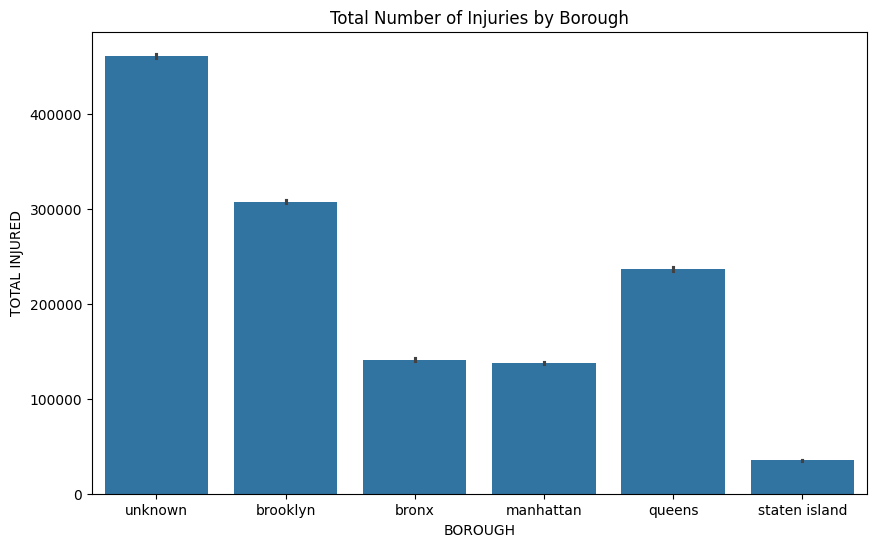

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='TOTAL INJURED', data=df, estimator=sum)
plt.title('Total Number of Injuries by Borough')
plt.show()

The bar graph below shows the total number of deaths by borough. The highest number of deaths per borough are Brooklyn and Queens. This could be due to the fact that Brooklyn and Queens are considered some of the most crowded are areas in New York City (*Population*, 2024).

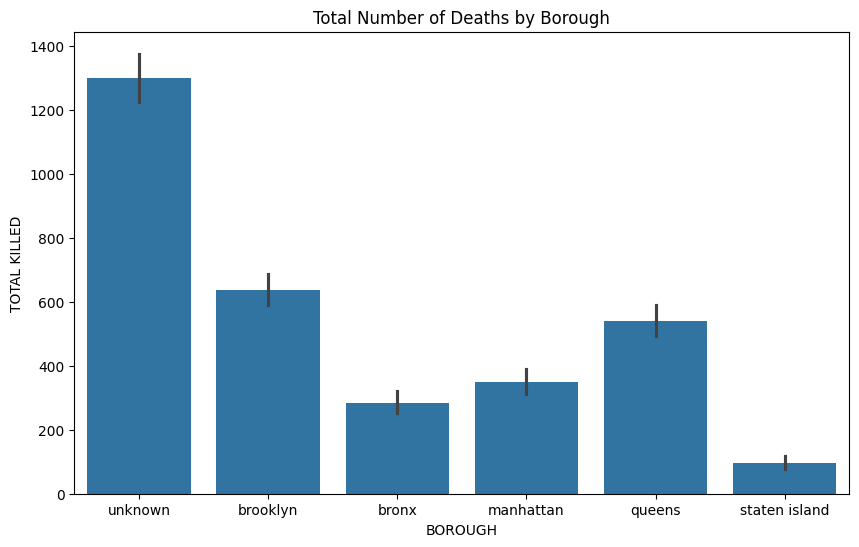

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='TOTAL KILLED', data=df, estimator=sum)
plt.title('Total Number of Deaths by Borough')
plt.show()

The code and graph below shows the top 10 contributing factors of crashes in New York City. To create this graph, we filtered out rows with the value of 'Unspecified,' counted the number of occurences of each contributing factor, sorted the number of contributing factors in descending order and displayed the top 10. Based on the bar graph, Diver Inattention/Distraction was significantly the highest contributing factor, causing 33.1% of crashes in New York City.

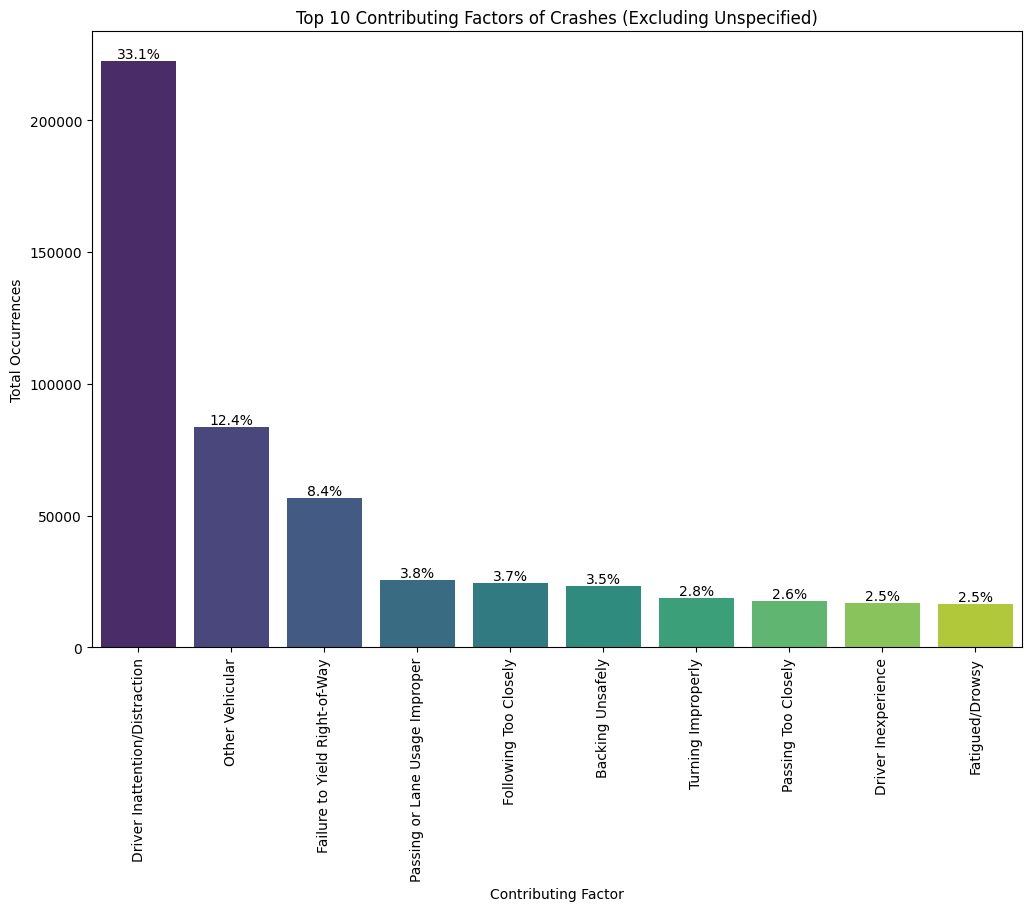

In [ ]:
# Filter out rows with 'Unspecified' in any of the contributing factor columns
df_filtered = df[
    ~df[['CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2',
        'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4',
        'CONTRIBUTING FACTOR VEHICLE 5']].isin(['Unspecified']).any(axis=1)
]

# Count occurrences of each contributing factor
contributing_factors = df_filtered[
    ['CONTRIBUTING FACTOR VEHICLE 1',
     'CONTRIBUTING FACTOR VEHICLE 2',
     'CONTRIBUTING FACTOR VEHICLE 3',
     'CONTRIBUTING FACTOR VEHICLE 4',
     'CONTRIBUTING FACTOR VEHICLE 5']
].apply(pd.Series.value_counts).fillna(0)

# Sum across columns to get total occurrences for each factor
contributing_factors['Total'] = contributing_factors.sum(axis=1)

# Calculate the percentage of total occurrences for each factor
contributing_factors['Percentage'] = (contributing_factors['Total'] / contributing_factors['Total'].sum()) * 100

# Sort factors by total occurrences and take the top 10
top_10_factors = contributing_factors.sort_values(by='Total', ascending=False).reset_index().head(10)

# Plot the data with percentage
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_factors, x='index', y='Total', palette='viridis', hue='index', dodge=False, legend=False)
for i, (total, percentage) in enumerate(zip(top_10_factors['Total'], top_10_factors['Percentage'])):
    plt.text(i, total, f'{percentage:.1f}%', ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Contributing Factor')
plt.ylabel('Total Occurrences')
plt.title('Top 10 Contributing Factors of Crashes (Excluding Unspecified)')
plt.show()


The 5 code belows was used to determine if there were any 'UNKOWN' values in the 'VEHICLE TYPE CODE' columns.

In [ ]:
df['VEHICLE TYPE CODE 1'].unique().tolist()

['Sedan',
 'Dump',
 'Station Wagon/Sport Utility Vehicle',
 'Tanker',
 'Bus',
 'Taxi',
 'Van',
 nan,
 'Motorscooter',
 'Bike',
 'E-Bike',
 'Ambulance',
 'Box Truck',
 'Garbage or Refuse',
 'Motorcycle',
 'E-Scooter',
 'UTILITY',
 'Pick-up Truck',
 'Convertible',
 'Tractor Truck Diesel',
 'Flat Bed',
 'Tow Truck / Wrecker',
 '�MBU',
 'PK',
 'Moped',
 'AMBULANCE',
 'Trailer',
 'SCHOOL BUS',
 'Lift Boom',
 'scooter',
 'CATER',
 'PKUP',
 'Carry All',
 'FDNY Ambul',
 '3-Door',
 'Beverage Truck',
 'SEMI TRAIL',
 'TOW TRUCK',
 'Motorbike',
 'UNKNOWN',
 'trailer',
 'Lunch Wagon',
 'dump',
 'Flat Rack',
 'UNK',
 'MOPED',
 'USPCS',
 'Tractor Truck Gasoline',
 'GARBAGE TR',
 'Minicycle',
 'FIRE TRUCK',
 'Armored Truck',
 'USPS truck',
 'COM',
 'Chassis Cab',
 'SW/VAN',
 'Bulk Agriculture',
 'Dot',
 'Concrete Mixer',
 'Open Body',
 'Excavator',
 'Fork lift',
 '4 dr sedan',
 'FORD VAN',
 'STREET SWE',
 'unknown',
 'fire truck',
 'Glass Rack',
 'COMMERCIAL',
 'PSD',
 'PICK UP',
 'Scooter',
 'MTA',
 

In [ ]:
df['VEHICLE TYPE CODE 2'].unique().tolist()

['Sedan',
 nan,
 'Pick-up Truck',
 'Tractor Truck Diesel',
 'Station Wagon/Sport Utility Vehicle',
 'Bike',
 'E-Scooter',
 'E-Bike',
 'Ambulance',
 'Moped',
 'Bus',
 'Motorcycle',
 'Taxi',
 'BOX VAN',
 '4 dr sedan',
 'Tanker',
 'AMBULANCE',
 'Convertible',
 'Box Truck',
 'DL',
 'Refrigerated Van',
 'Tow Truck / Wrecker',
 'Garbage or Refuse',
 'Chassis Cab',
 'Flat Rack',
 'Van',
 'Dump',
 'PK',
 'Tractor Truck Gasoline',
 'Motorbike',
 'Concrete Mixer',
 'Multi-Wheeled Vehicle',
 'fire truck',
 'Hopper',
 'FDNY TRUCK',
 'VAN/TRUCK',
 'Pedicab',
 'Flat Bed',
 'Motorscooter',
 'FDNY ENGIN',
 'Carry All',
 'FIRE TRUCK',
 'MOPED',
 'Dirt Bike',
 'FIRETRUCK',
 'util truck',
 'Armored Truck',
 'BOX',
 'NYC FIRE T',
 'Van Camper',
 'Lift Boom',
 'VAn',
 'firetruck',
 'PRIVATE',
 'SCOOTER',
 'WHEELCHAIR',
 'TOW TRUCK',
 'pickup tru',
 'Stake or Rack',
 'Food cart',
 '999',
 'UNK',
 'Beverage Truck',
 'POWER SHOV',
 'work van',
 'bus',
 '3-Door',
 'NICE BUS',
 'TRAILER',
 'TRUCK',
 'Firetruck'

In [ ]:
df['VEHICLE TYPE CODE 3'].unique().tolist()

[nan,
 'Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Pick-up Truck',
 'E-Scooter',
 'Box Truck',
 'Van',
 'Taxi',
 'Bike',
 'E-Bike',
 'Motorbike',
 'Motorcycle',
 'Bus',
 'Flat Bed',
 'Tow Truck / Wrecker',
 'Tractor Truck Diesel',
 'Ambulance',
 'PK',
 'Dump',
 'Bulk Agriculture',
 'COMMERCIAL',
 'Moped',
 'Tractor Truck Gasoline',
 'Armored Truck',
 'Sprinter V',
 'Refrigerated Van',
 'DUMP',
 'FIRE TRUCK',
 'UNK',
 'Convertible',
 '4 dr sedan',
 'TRAILER',
 'DELIVERY T',
 'Chassis Cab',
 'Open Body',
 'TOW TRUCK',
 'Garbage or Refuse',
 'Concrete Mixer',
 'Commercial',
 'PASSENGER',
 'GARBAGE TR',
 'FDNY FIRE',
 'AMB',
 'Lift Boom',
 'Tanker',
 'School bus',
 'STATION WA',
 'LIMO',
 'NYC AMBULA',
 'Trailor',
 'MOPED',
 'AMBULANCE',
 'Moped scoo',
 'sprinter',
 'C1',
 'vehicle tr',
 'School Bus',
 'BOOM 60FT',
 'Cargo',
 'US GOVERME',
 'BOX TRUCK',
 'NYC SANITA',
 'HOME MADE',
 'Carry All',
 'Multi-Wheeled Vehicle',
 'Budget tru',
 'Unknown',
 'USPS POSTA',
 'Motorscooter',
 'R

In [ ]:
df['VEHICLE TYPE CODE 4'].unique().tolist()

[nan,
 'Station Wagon/Sport Utility Vehicle',
 'Sedan',
 'Box Truck',
 'Van',
 'Taxi',
 'bus',
 'Pick-up Truck',
 'Tow Truck / Wrecker',
 'School Bus',
 'Bike',
 'van',
 'Tractor Truck Diesel',
 'Dump',
 'Tanker',
 'Convertible',
 'Moped',
 'Bus',
 'E-Scooter',
 'Beverage Truck',
 'E-Bike',
 'DELIVERY T',
 'Motorcycle',
 'Pedicab',
 'Courier',
 '4 dr sedan',
 'SUBURBAN',
 'NYC TRANSI',
 'SEDAN',
 'Flat Bed',
 'UNK',
 'Trailor',
 'PK',
 'Firetruck',
 'LIMO',
 'ECONOLINE',
 'Carry All',
 'Tractor Truck Gasoline',
 'Garbage or Refuse',
 'Lift Boom',
 '3-Door',
 'AMBULANCE',
 'Bulk Agriculture',
 'WORK VAN',
 'SNOWMOBILE',
 'Motorscooter',
 'UHAUL',
 'Ambulance',
 'Refrigerated Van',
 'PICK-UP TR',
 'TRAILER',
 'trailor',
 'CARGO VAN',
 'FLATBED TR',
 'Box',
 'Chassis Cab',
 'Open Body',
 'FDNY',
 'TLR',
 'TOYOT',
 'SPRIN',
 'TRAIL',
 'Multi-Wheeled Vehicle',
 'Deliv',
 'TOW T',
 'TRACT',
 'trail',
 'dump',
 'PAS 5',
 '2 dr sedan',
 'AMBUL',
 'BURG',
 'PASSENGER VEHICLE',
 'MOPED',
 'JEEP'

In [ ]:
df['VEHICLE TYPE CODE 5'].unique().tolist()

[nan,
 'Station Wagon/Sport Utility Vehicle',
 'Sedan',
 'Pick-up Truck',
 'Taxi',
 'Dump',
 'Van',
 'Moped',
 'Box Truck',
 'C3',
 'Motorcycle',
 'Bike',
 'Tractor Truck Diesel',
 'E-Scooter',
 'Bus',
 'Tow Truck / Wrecker',
 'TRACTOR TR',
 'Lunch Wagon',
 'Truck',
 'E-BIKE',
 'TRAILOR',
 'Armored Truck',
 'Tractor Truck Gasoline',
 'E-Bike',
 'Convertible',
 'PK',
 'SNOWMOBILE',
 'Motorscooter',
 'trailer',
 'VAN FORD',
 'BOX Truck',
 'Box truck',
 'van',
 'FRONT',
 'Wagon',
 'back',
 'Ambulance',
 'Carry All',
 'TRUCK',
 'TRK',
 'dump',
 'OML',
 'Flat Rack',
 'Bulk Agriculture',
 'Tanker',
 'Chassis Cab',
 '4 dr sedan',
 'PICK-UP TRUCK',
 '2 dr sedan',
 'UNKNOWN',
 'PASSENGER VEHICLE',
 'SPORT UTILITY / STATION WAGON',
 'OTHER',
 'SMALL COM VEH(4 TIRES) ',
 'TAXI',
 'VAN',
 'LIVERY VEHICLE',
 'LARGE COM VEH(6 OR MORE TIRES)',
 'BUS',
 'MOTORCYCLE',
 'AMBULANCE',
 'BICYCLE',
 'SCOOTER',
 'TRAILER',
 'Concrete Mixer',
 'UNK',
 'STREET SWE',
 'UHAUL TRAI',
 'Soccer',
 'FORD SUPER',
 'F

The code and graph below show the types of vehicles involved in crashes in New York City. The code filters null and 'UNKOWN' values from above, counts the occurence of each vehicle type involved in an accident, and gets the top 10 vehicles involved.

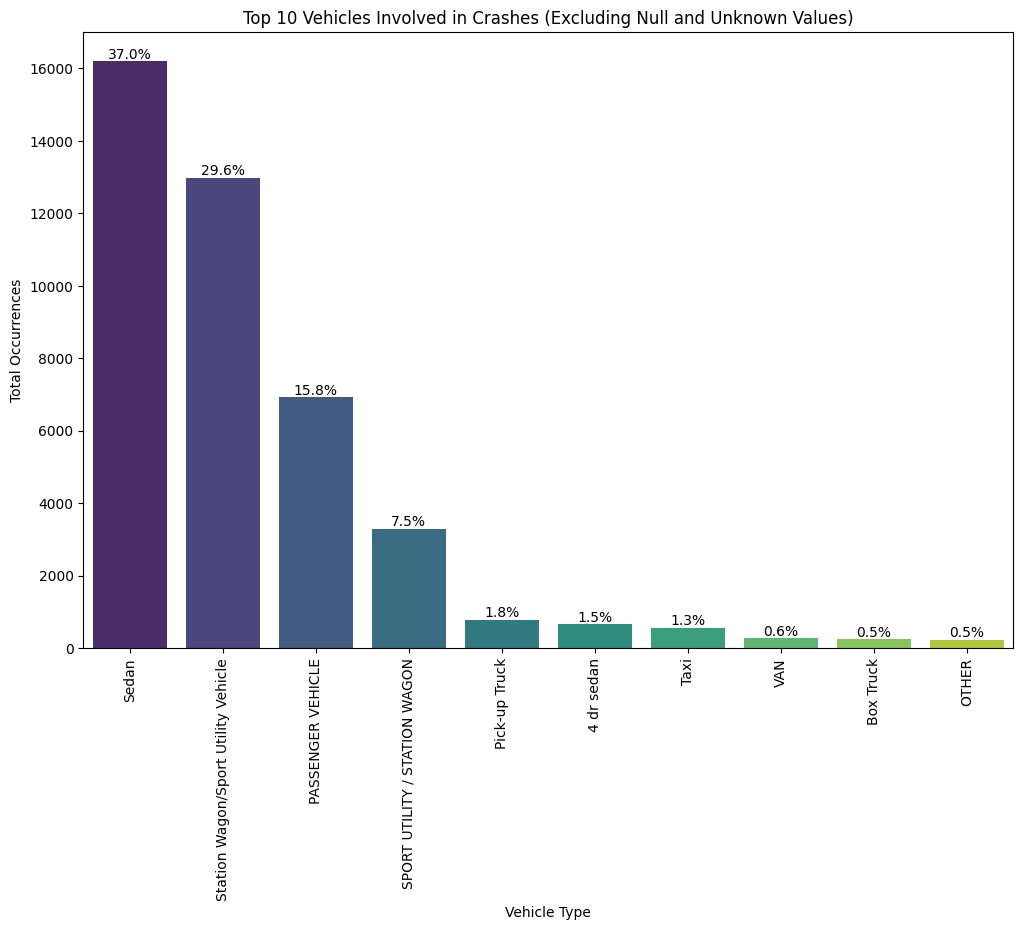

In [ ]:
# Filter out rows with Null and Unknown values in the vehicle type code columns
df_filter = df[
    ~df[['VEHICLE TYPE CODE 1',
         'VEHICLE TYPE CODE 2',
         'VEHICLE TYPE CODE 3',
         'VEHICLE TYPE CODE 4',
         'VEHICLE TYPE CODE 5']].isin(['UNKNOWN']).any(axis=1) &
    df[['VEHICLE TYPE CODE 1',
        'VEHICLE TYPE CODE 2',
        'VEHICLE TYPE CODE 3',
        'VEHICLE TYPE CODE 4',
        'VEHICLE TYPE CODE 5']].notna().all(axis=1)
]

# Count the occurrences that each vehicle type was involved with an accident
contributing_vehicles = df_filter[
    ['VEHICLE TYPE CODE 1',
     'VEHICLE TYPE CODE 2',
     'VEHICLE TYPE CODE 3',
     'VEHICLE TYPE CODE 4',
     'VEHICLE TYPE CODE 5']
].apply(pd.Series.value_counts).fillna(0)

# Sum across columns to get total occurrences for each vehicle type
contributing_vehicles['Total'] = contributing_vehicles.sum(axis=1)

# Calculate the percentage of total occurrences for each vehicle type
contributing_vehicles['Percentage'] = (contributing_vehicles['Total'] / contributing_vehicles['Total'].sum()) * 100

# Sort factors by total occurrences and take the top 10
top_10_vehicles = contributing_vehicles.sort_values(by='Total', ascending=False).reset_index().head(10)

# Plot the data with percentage
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_vehicles, x='index', y='Total', palette='viridis', hue='index', dodge=False, legend=False)
for i, (total, percentage) in enumerate(zip(top_10_vehicles['Total'], top_10_vehicles['Percentage'])):
    plt.text(i, total, f'{percentage:.1f}%', ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Occurrences')
plt.title('Top 10 Vehicles Involved in Crashes (Excluding Null and Unknown Values)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The graph above shows that Sedans were the most involved in vehicle collisons (37%). According to Jones (2024), "sedans are among the most common vehicles on the road, and they are frequently involved in auto accidents....While many modern sedans come equipped with airbags and antilock brakes, they may not have lane-keeping assist or automatic emergency braking systems that can prevent auto accidents." Thus, this may suggest that in addition to the 'contributing factor' columns, the type of car may affect the number of people injured if they are involved in an accident. However, the type of car is not necessairly the cause of car crashes since most of the contributing factors, as seen in the top 10 contributing factors graph, are from irresponsible human behaviors while being behind the wheel.

The code block below uses feature engineering to convert the days of the week and time of day into numerical values. For days of the week it is indexed from 0-6 (Monday-Sunday), while for the time of day, it is 0-3 (Morning, Afternoon, Evening, and Night.).

In [ ]:
# Convert 'day_of_week' to numeric
df['day_of_week_num'] = df['day_of_week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6})
# Convert 'time_of_day' to numeric
df['time_of_day_num'] = df['time_of_day'].map({
    'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

The code block below sets up the top 10 contributing factors to create a correlation matrix.

In [ ]:
# Define the top 10 contributing factors
top_10_factors_list = [
    'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
    'Following Too Closely', 'Backing Unsafely', 'Passing or Lane Usage Improper',
    'Unsafe Lane Changing', 'Turning Improperly', 'Alcohol Involvement',
    'Unsafe Speed', 'Other Vehicular'
]

# Create a mapping from contributing factors to numbers
factor_mapping = {factor: i+1 for i, factor in enumerate(top_10_factors_list)}

# Function to map contributing factors to numbers
def map_factors(factor):
    return factor_mapping.get(factor, 0)  # 0 for factors not in the top 10

# Apply the mapping to each contributing factor column
for i in range(1, 6):
    col_name = f'CONTRIBUTING FACTOR VEHICLE {i}'
    df[f'FACTOR_{i}'] = df[col_name].apply(map_factors)

# Add the new features to the correlation matrix
numeric_features = df.select_dtypes(include=['float', 'int']).columns
correlation_matrix = df[numeric_features].corr()

Below, we created a pairplot to visualize the relationship between the following colums: "'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'LATITUDE', 'LONGITUDE'". In pairplots, there are scatterplots and histograms. The scatterplots are located everywhere expect the left diagonal and they are good at showing the relationship (correlation) between two variables. The histograms, which are univariate plots, are used to show the distribution of values of a single variable. For example, some values may be distributed in a range from 1-10. As seen in the scatterplots, there is no relationship between the 'NUMBER OF PERSONS KILLED' and 'LONGITUDE,' the 'NUMBER OF PERSONS KILLED' and 'LATITUDE,' the 'NUMBER OF PERSONS INJURED' and 'LONGITUDE,' the 'NUMBER OF PERSONS INJURED' and 'LATITUDE,' and the 'LATITUDE' and 'LONGITUDE.' However, there is a weak negative correlation between the 'NUMBER OF PERSONS INJURED' and the 'NUMBER OF PERSONS KILLED.' This does not necssiarly mean that the 'NUMBER OF PERSONS INJURED' is a cause of the 'NUMBER OF PERSONS KILLED.' The univariate plots in the left diagonals of the pairplot show that most of the values in the 'NUMBER OF PERSONS KILLED' column and the 'NUMBER OF PERSONS INJURED' column are mostly the same values. The 'NUMBER OF PERSONS KILLED' values are mainly 0 and the 'NUMBER OF PERSONS INJURED' are mainly 0 with a few values ranging from 2-4.

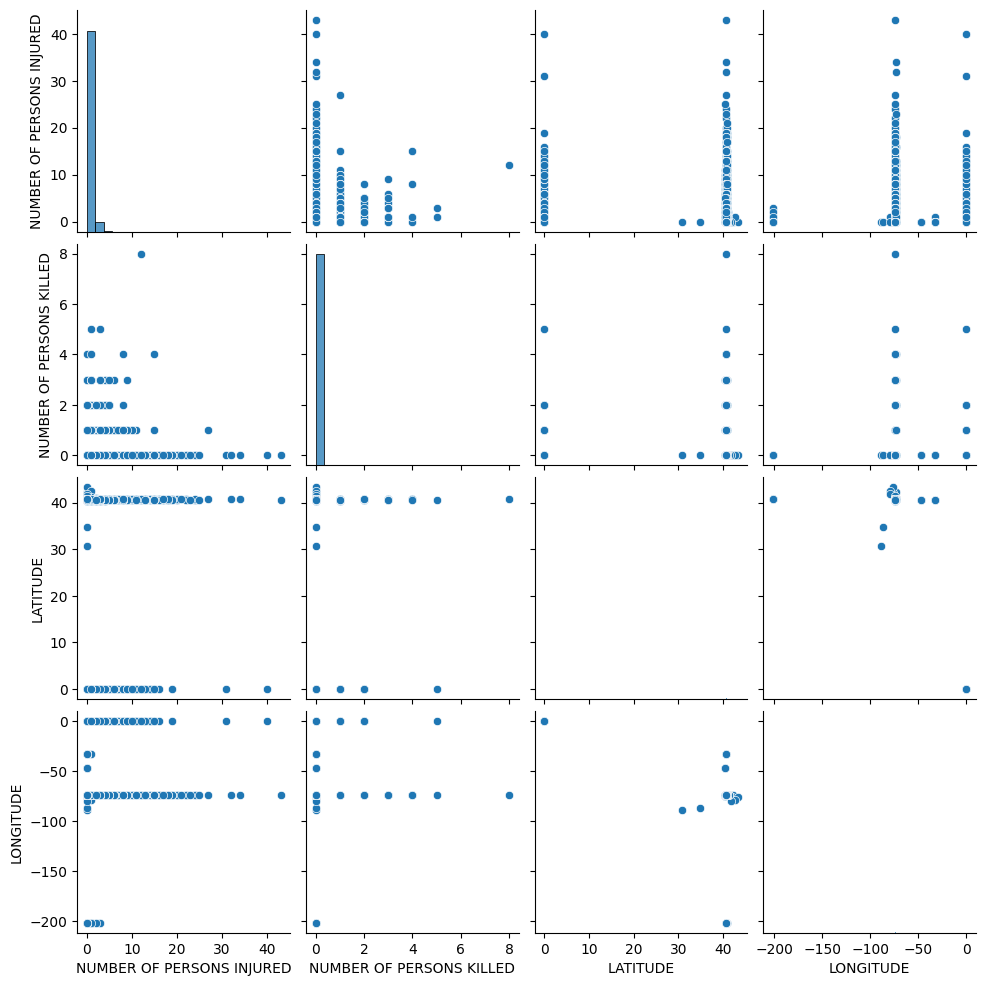

In [ ]:
# Selecting a subset of columns for the pairplot
columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'LATITUDE', 'LONGITUDE']
subset_df = df[columns]

# Creating the pairplot
sns.pairplot(subset_df)
plt.show()

The code below displays the total number of crash accidents that occur per hour. As seen, most accidents happen between hours 14 and 17 (millitary time). This could be due to the fact most people leave from their jobs around this time. There is also a peak at hour 8 when most people arrive to work.

Text(0.5, 1.0, 'Total Accidents per Hour')

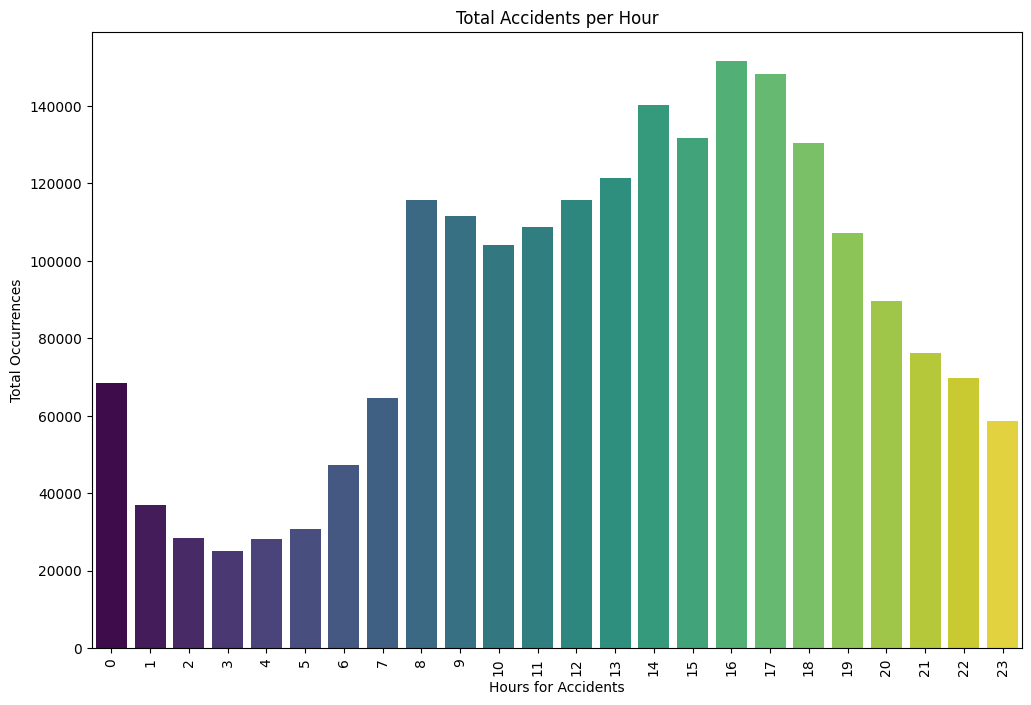

In [ ]:
#show what times the most accidents happen
accident_hours = df['hour'].value_counts().reset_index()
accident_hours.sort_values(by='count', ascending = False)
accident_hours.columns = ['hour', 'Total']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=accident_hours, x='hour', y='Total', palette='viridis', hue='hour', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Hours for Accidents')
plt.ylabel('Total Occurrences')
plt.title('Total Accidents per Hour')

The code below shows the days of the week and each hour on each day when the most vehicle crash accidents occur. As seen, Friday at hour 16 is when the most car accidents occur. Additionally, for most of the days of the week (except for Sunday), hour 16 is when the most distracted driving occurs.

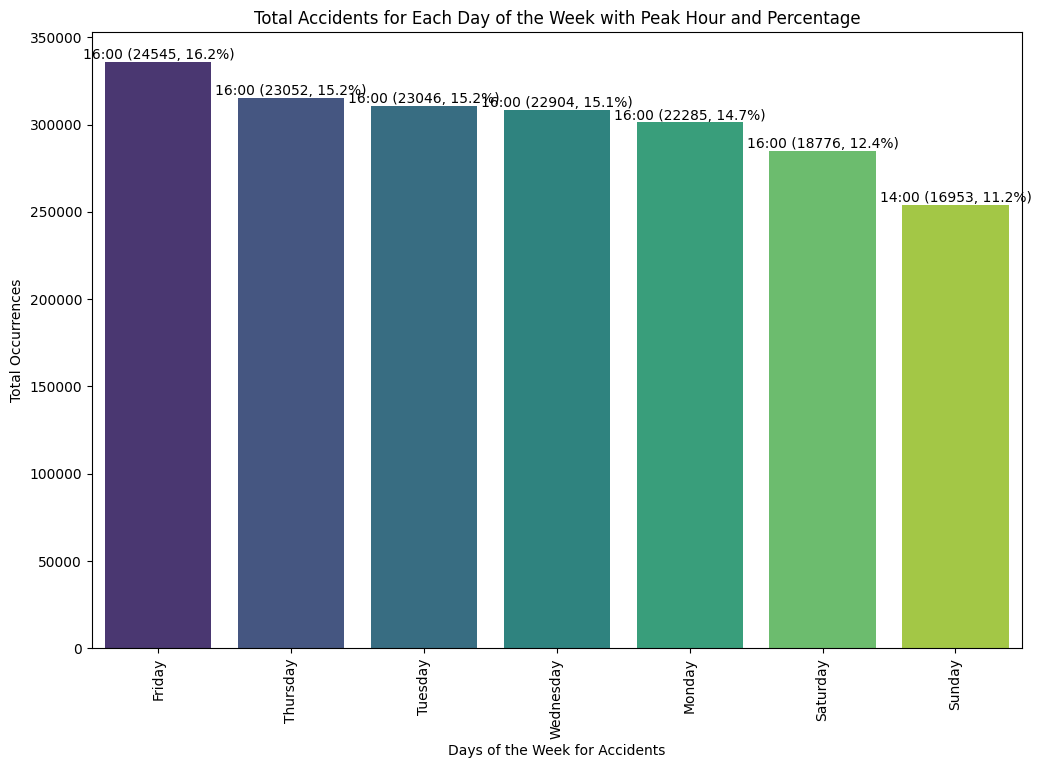

In [ ]:
# Show what day of the week the most accidents occur
accident_day_of_week = df['day_of_week'].value_counts().reset_index()
accident_day_of_week.columns = ['day_of_week', 'Total']

# Find the hour with the highest total occurrences for each day
df['hour'] = df['CRASH TIME'].apply(lambda x: x.hour)
accidents_by_day_hour = df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
max_hour_per_day = accidents_by_day_hour.loc[accidents_by_day_hour.groupby('day_of_week')['count'].idxmax()]

# Calculate the percentage of total occurrences for the peak hour
max_hour_per_day['Percentage'] = (max_hour_per_day['count'] / max_hour_per_day['count'].sum()) * 100

# Merge the max hour data with the day of the week data
accident_day_of_week = accident_day_of_week.merge(max_hour_per_day, on='day_of_week')
accident_day_of_week.columns = ['day_of_week', 'Total', 'hour', 'hourly_count', 'Percentage']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=accident_day_of_week, x='day_of_week', y='Total', palette='viridis', hue='day_of_week', dodge=False, legend=False)
for i, (total, hour, hourly_count, percentage) in enumerate(zip(accident_day_of_week['Total'], accident_day_of_week['hour'], accident_day_of_week['hourly_count'], accident_day_of_week['Percentage'])):
    plt.text(i, total, f'{hour}:00 ({hourly_count}, {percentage:.1f}%)', ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Days of the Week for Accidents')
plt.ylabel('Total Occurrences')
plt.title('Total Accidents for Each Day of the Week with Peak Hour and Percentage')
plt.show()


From the above data analysis, we identified that Driver Inattention/Distraction is a major contributing factor of vehicle collisions in New York City, more than the other 9 factors listed in the top 10 contributing factors graph. Additionally, the name of the boroughs, the hour of the day, and the day of the week has an impact on the number of crashes in New York City.

Since Diver Inattention/Distraction had a higher contributing factor to crashes in New York City, compared to the other contributing factors, the purpose of the code blocks below (until the Machine Learning Models Section) is to identify why Diver Inattention/Distraction is occuring and to pinpoint the features ('BOROROUGH', 'HOUR', 'DAY OF WEEK,' and more) from the above data analysis that will be used for the machine learning models.

In [ ]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'year', 'month', 'day_of_week', 'hour',
       'is_weekend', 'TOTAL KILLED', 'TOTAL INJURED', 'injury_severity',
       'location_type', 'total_vehicles_involved', 'time_of_day',
       'day_of_week_num', 'time_of_day_num', 'FACTOR_1', 'FACTOR_2',
       

The code below filters the dataset to observe when the most Driver Inattention/Distraction occurs: Morning, Afternoon, Evening, and Night. As seen, the most occurences of distracted driving occur in the afternoon.

In [ ]:
#filter dataframe so that we can see when any instance of distracted driving occur
rows = df[df[['CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2',
        'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4',
        'CONTRIBUTING FACTOR VEHICLE 5']].apply(lambda x: x.isin(['Driver Inattention/Distraction']).any(), axis=1)]

Text(0.5, 1.0, 'Occurences of Distracted Driving')

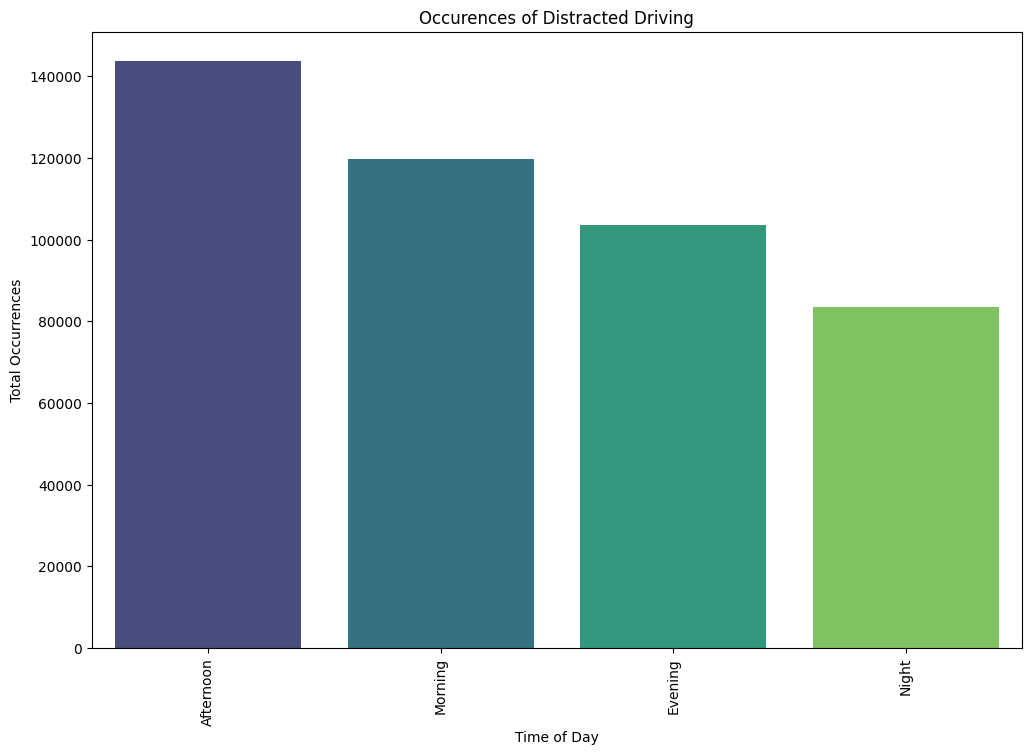

In [ ]:
#display the time of day when distracted driving occurs
rows_time_of_day = rows['time_of_day'].value_counts().reset_index()
rows_time_of_day.sort_values(by='count', ascending = False)


# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=rows_time_of_day, x='time_of_day', y='count', palette='viridis', hue='time_of_day', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Time of Day')
plt.ylabel('Total Occurrences')
plt.title('Occurences of Distracted Driving')

The code below filters the dataset to observe the specific hours (in military time) of when the most Driver Inattention/Distraction occurs. The two highest occurences of distracted driving occur at hour 16 and 17. There is also a peak in hour 8 and 9, which is the time that most people go to work.

Text(0.5, 1.0, 'Hours of when Distracted Driving')

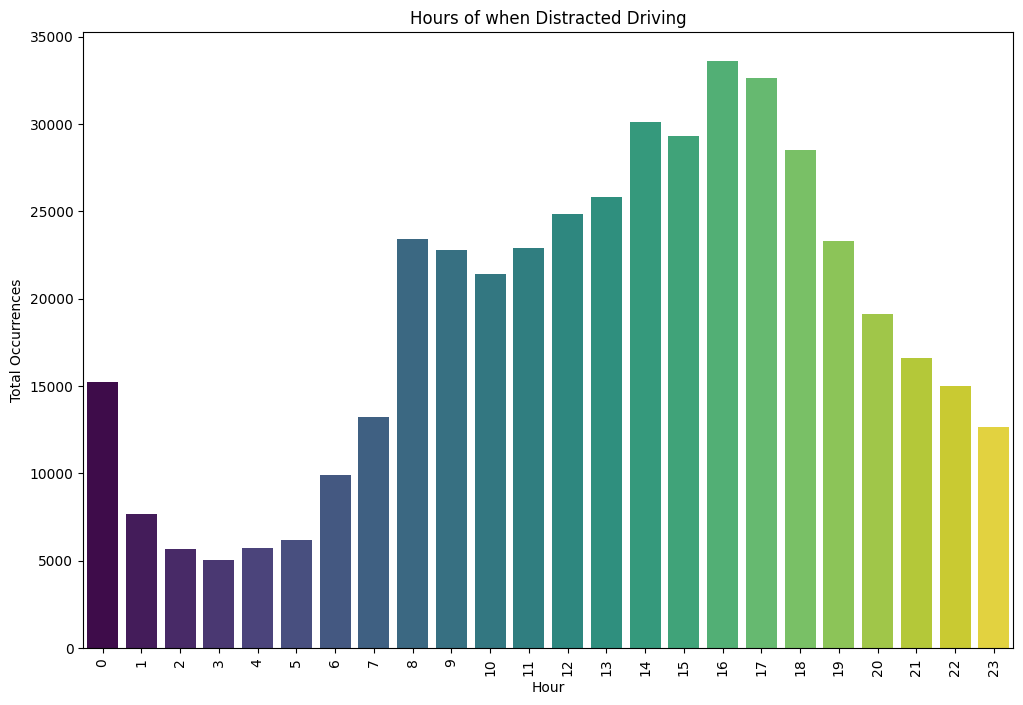

In [ ]:
rows_hour = rows['hour'].value_counts().reset_index()
rows_hour.sort_values(by='count', ascending = False)


# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=rows_hour, x='hour', y='count', palette='viridis', hue='hour', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Hour')
plt.ylabel('Total Occurrences')
plt.title('Hours of when Distracted Driving')

The code below filters the dataset to observe the days of the week when most Driver Inattention/Distraction occurs. Once again, Friday is the day of the week when the most distracted driving occurs.

Text(0.5, 1.0, 'Days of the week when the most Distracted Driving Occurs')

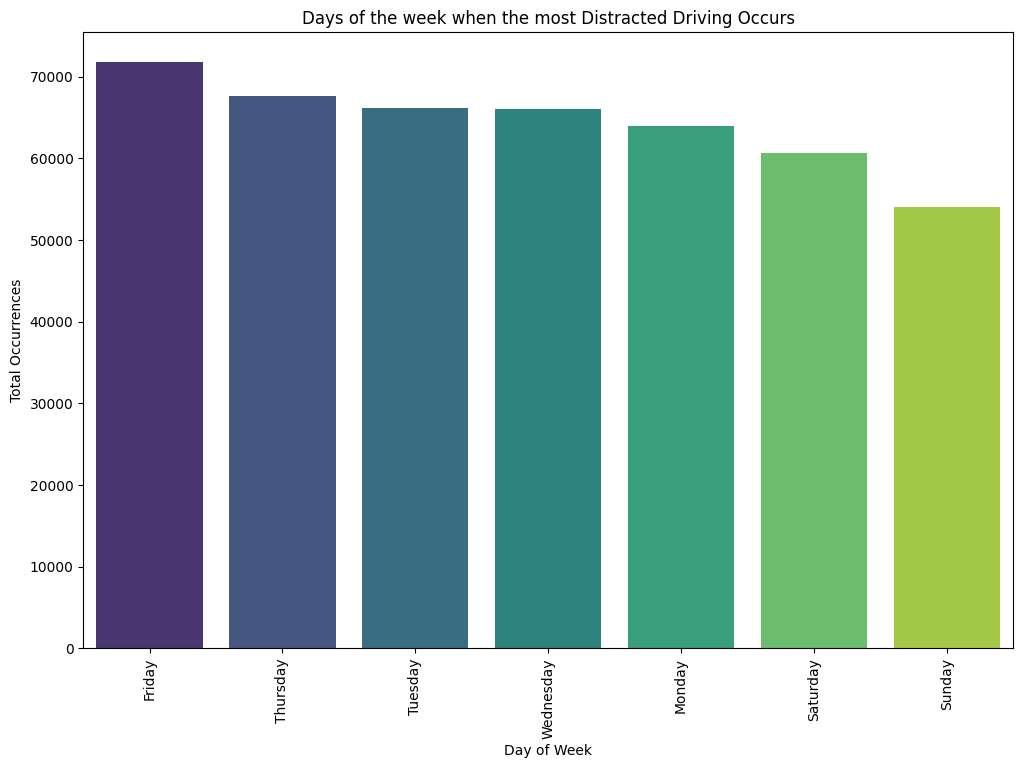

In [ ]:
#Display days of the week when the most distracted driving occurs
rows_day_of_week = rows['day_of_week'].value_counts().reset_index()
rows_day_of_week.sort_values(by='count', ascending = False)


# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=rows_day_of_week, x='day_of_week', y='count', palette='viridis', hue='day_of_week', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Day of Week')
plt.ylabel('Total Occurrences')
plt.title('Days of the week when the most Distracted Driving Occurs')

The code below creates a correlation matrix of all of the numeric features of the dataset. The purpose of this matrix is to more clearly observe the relationship between each two features, beyond the pairplot above. This will help us determine which values will be used to predict the 'NUMBER OF PERSONS KILLED' when developing our machine learning models. The values closer to 1 have a positive correlation while values closer to -1 have a negative correlation.

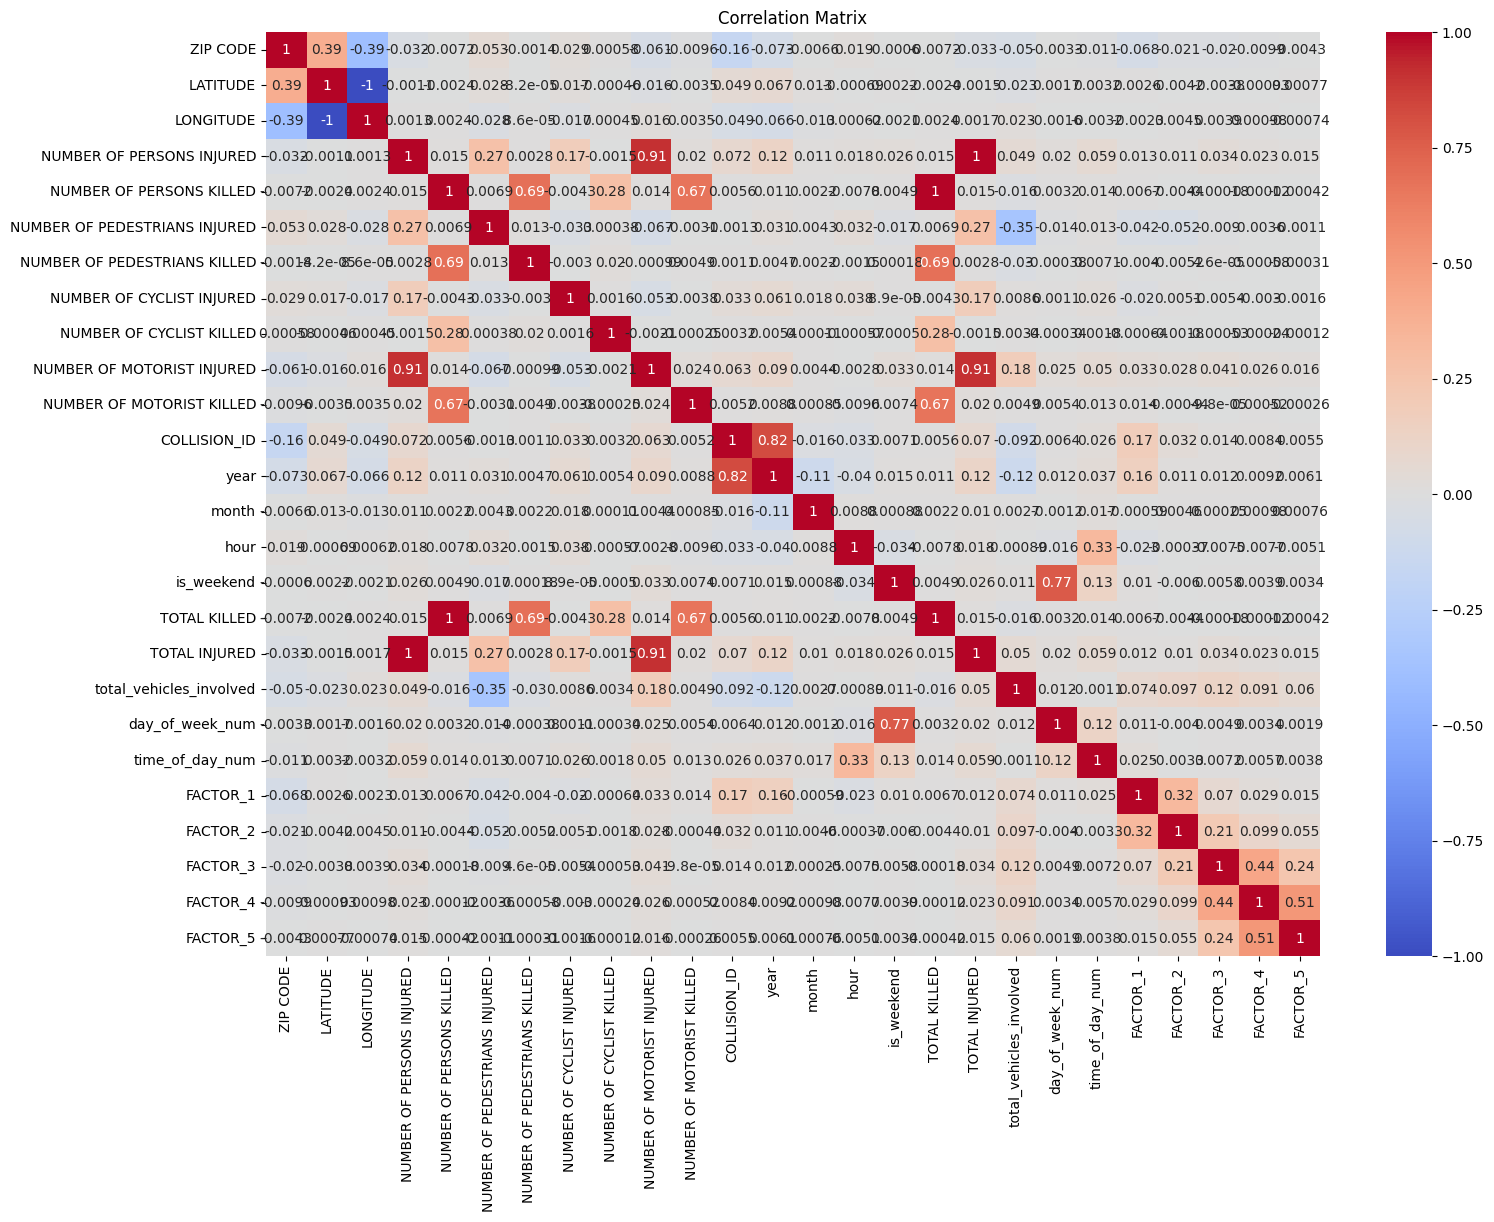

In [ ]:
# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=['float', 'int']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(17, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The code below creates an accident map of where in New York City the number of persons killed the most occurs, based on the latitude and longitude, which will help us determine if latitude and longitude should be used in our machine learning models.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Select a subset of data (first 1.5 million rows)
killed_df = df.head(150000)

# Filter out rows with latitude, longitude, and number of persons killed equal to 0.0
filtered_df = killed_df[(killed_df['LATITUDE'] != 0.0) & (killed_df['LONGITUDE'] != 0.0) & (killed_df['NUMBER OF PERSONS KILLED'] != 0.0)]

# Calculate mean latitude and longitude from the filtered subset
mean_latitude = filtered_df['LATITUDE'].mean()
mean_longitude = filtered_df['LONGITUDE'].mean()

# Create a base map
accident_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(accident_map)

# Function to determine marker color based on number of persons killed
def get_marker_color(killed):
    if killed < 3:
        return 'green'
    elif 3 <= killed < 5:
        return 'orange'
    else:
        return 'red'

# Add markers for accident locations from the filtered subset to the marker cluster
for _, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Number of Persons Killed: {row['NUMBER OF PERSONS KILLED']}",
        icon=folium.Icon(color=get_marker_color(row['NUMBER OF PERSONS KILLED']))
    ).add_to(marker_cluster)

# Display the map
accident_map


# Machine Learning Models

Three machine learning models will be used here: Linear Regression, Logistic Regression, and Random Forest. The reason why these three models were used was to predict a numerical value based on the features, since the 'NUMBER OF PERSONS KILLED' column is numerical. All three of these models are usually used in classification and regression tasks, and our problem is regression.

Since most of the features are all equally weakly correlated to the 'NUMBER OF PERSONS KILLED,' we decided to select the features of 'year', 'month,' 'hour,' 'is_weekend,' 'day_of_week_num,' and 'time_of_day_num' to predict the label of 'NUMBER OF PERSONS KILLED.' This is because the most distracted and inattentive driving occurs after leaving from work (hour 16) on Fridays, as seen from the Expolartory Data Analysis Section. However, although the location ('LATITUDE,' 'LONGITUDE,' and 'BOROUGH') for the most fatal crahes and injuries is weakly correlated to the 'NUMBER OF PERSONS KILLED,' distracted driving can often occur at any location, even if the borough is slightly less crowded in population size. Considering that all of the boroughs shown in the Exploratory Data Analysis have large populations, with minimal differences in the numercial value, features such as the time of day, week, year, month, and hour are shown to affect the number of cars on the road, and most people are in veichles when they leave or arrive from work.

The code below shows which features ('year', 'month', 'hour', 'is_weekend', 'day_of_week_num', 'time_of_day_num') we are using to predict the label of the 'NUMBER OF PERSONS KILLED.' As seen, the test set will be a size of 0.3, while the training set is 0.7. This means 30% of the data will be used for testing the dataset and 70% will be used for training the dataset.

In [ ]:
# Using 'NUMBER OF PERSONS KILLED' as the target variable
X = df[['year', 'month', 'hour', 'is_weekend', 'day_of_week_num', 'time_of_day_num']]
y = df['NUMBER OF PERSONS KILLED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


All three models generate the same statistics for the classification report. As seen by the classification reports of the Linear Regression, Logistic Regression, and Random Forest, they all have an overall accuracy of 1.0, macro averages of 0.2, and weighted averages of 1.0. It is also important to note that the models can accurately predict the label of 'NUMBER OF PERSONS KILLED' of class 0.0 since the precision, recall, and f1-scores have values of 1.0. However, the rest of the classes' precision, recall, and f1-scores were 0.0. Even though the overall accuracy and weighted averages of the model is 1.0, the macro averages of 0.2 shows that this dataset contains an imbalance in the number of values that belong to the classes, most values in the dataset belong to class 0, as seen by the support values. This also reflected in the confusion matrices below because the support values are displayed in one column only.

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression Report:\n", classification_report(y_test, y_pred_lin.astype(int)))

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear Regression Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    632182
         1.0       0.00      0.00      0.00       872
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00    633083
   macro avg       0.20      0.20      0.20    633083
weighted avg       1.00      1.00      1.00    633083



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    632182
         1.0       0.00      0.00      0.00       872
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00    633083
   macro avg       0.20      0.20      0.20    633083
weighted avg       1.00      1.00      1.00    633083



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    632182
         1.0       0.00      0.00      0.00       872
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00    633083
   macro avg       0.20      0.20      0.20    633083
weighted avg       1.00      1.00      1.00    633083



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The code below shows a confusion matrix for all of the machine learning model algorithms with the true positive, true negative, false positive, and false negative values. The rows actual class values while the columns represent the predicted class values. The confusion matrix below also indicates that there is a class imbalance.

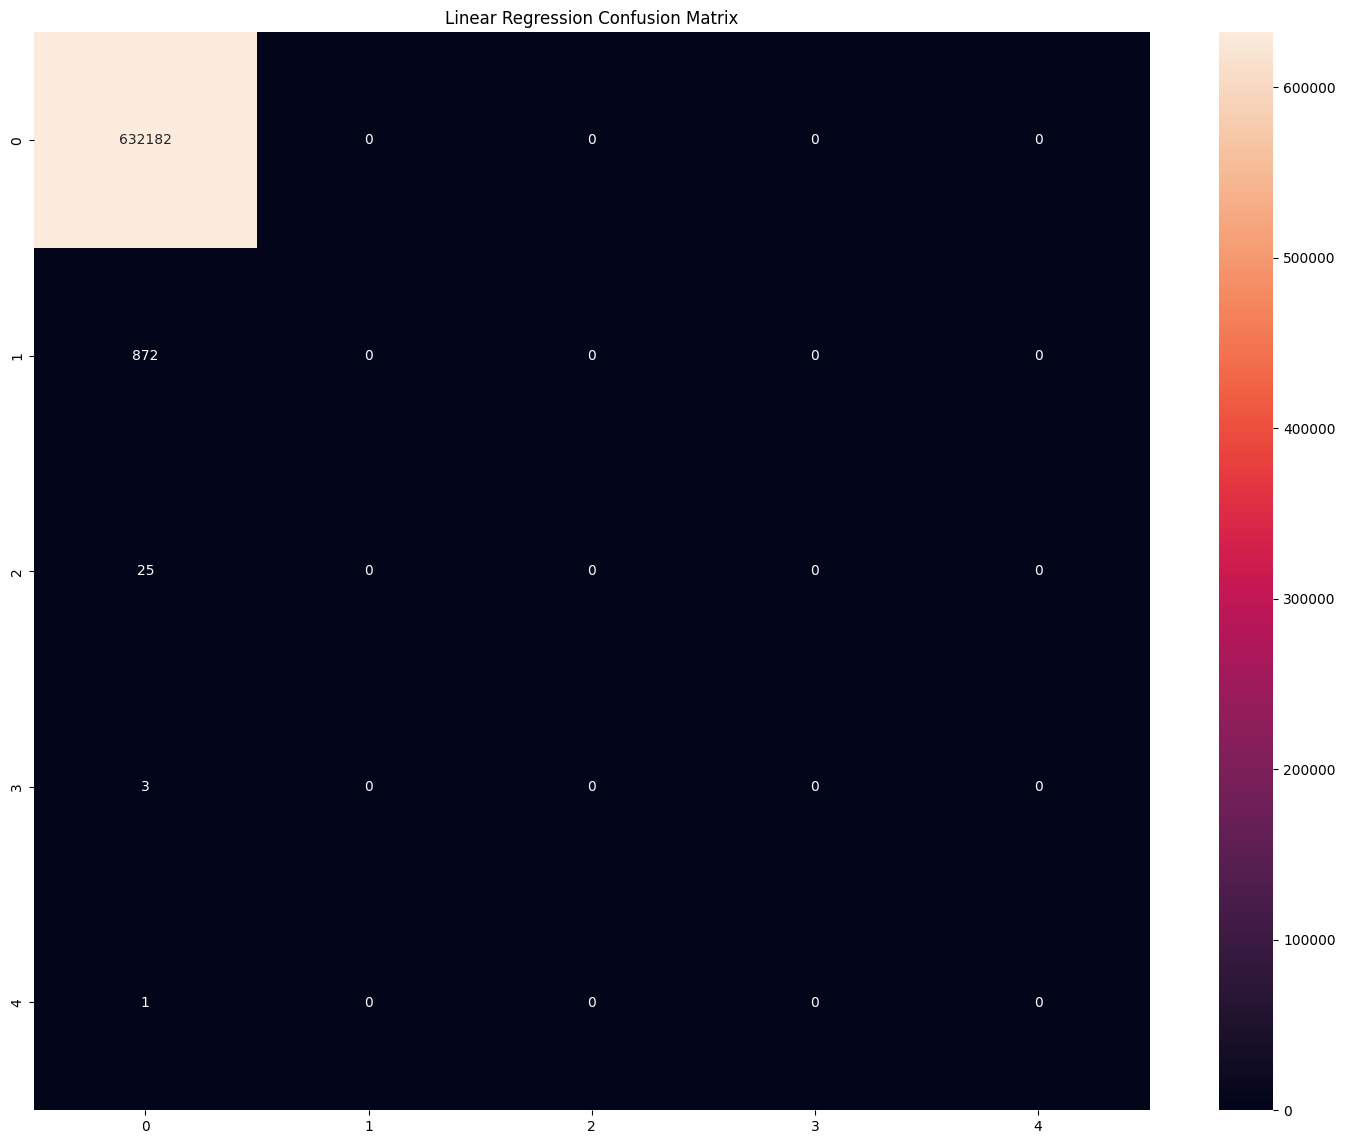

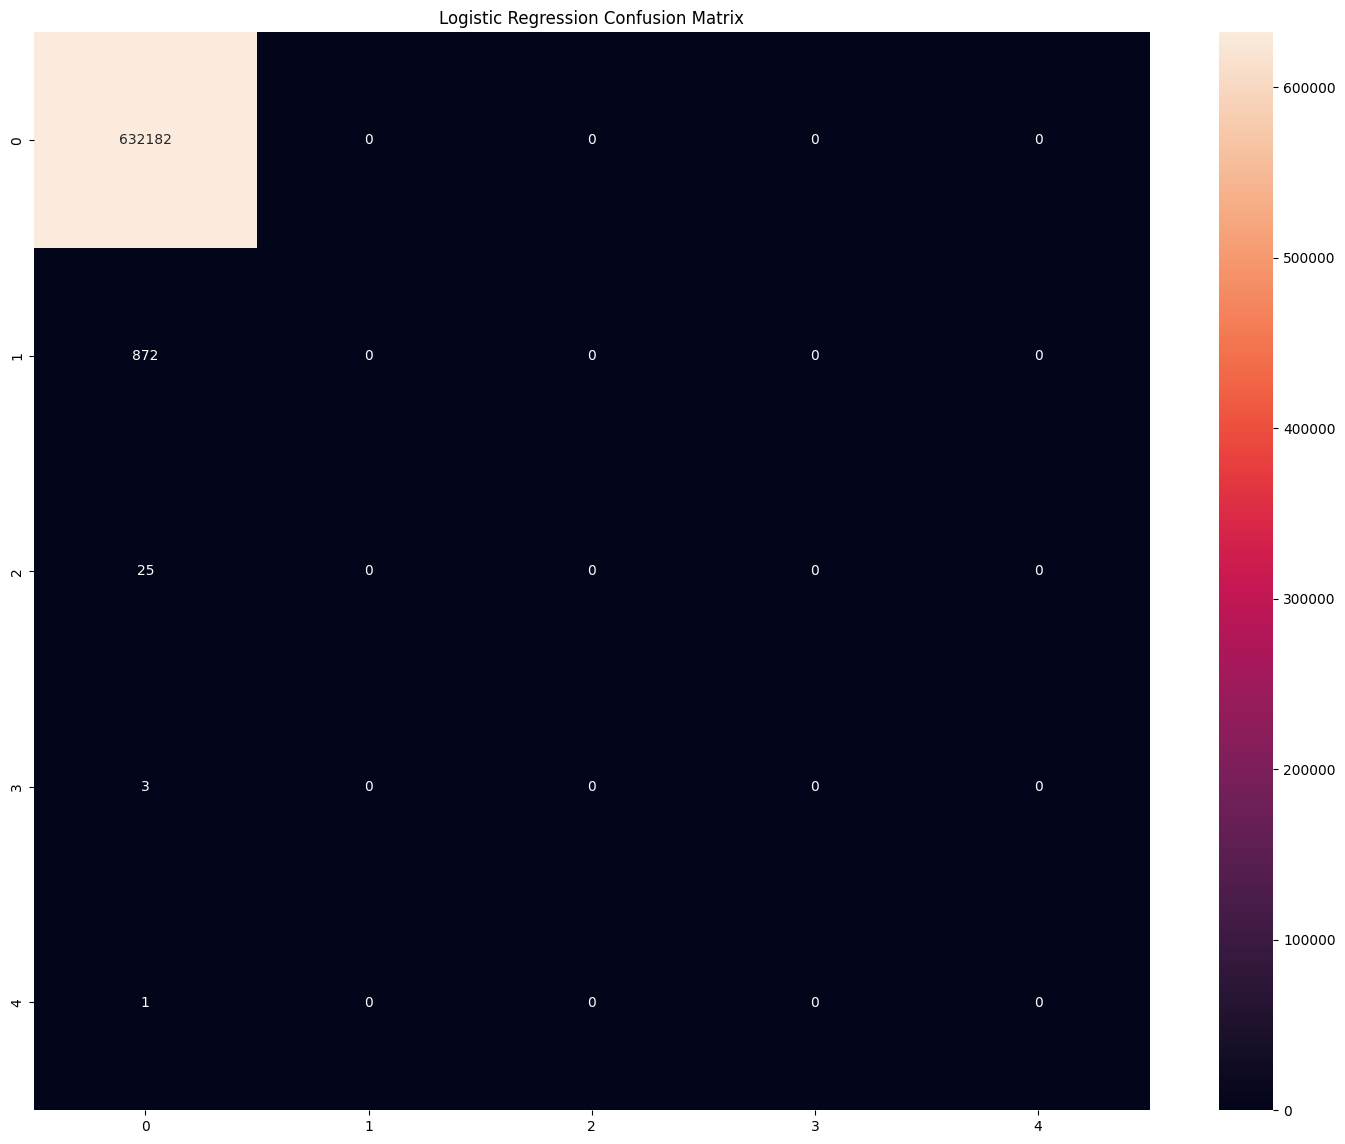

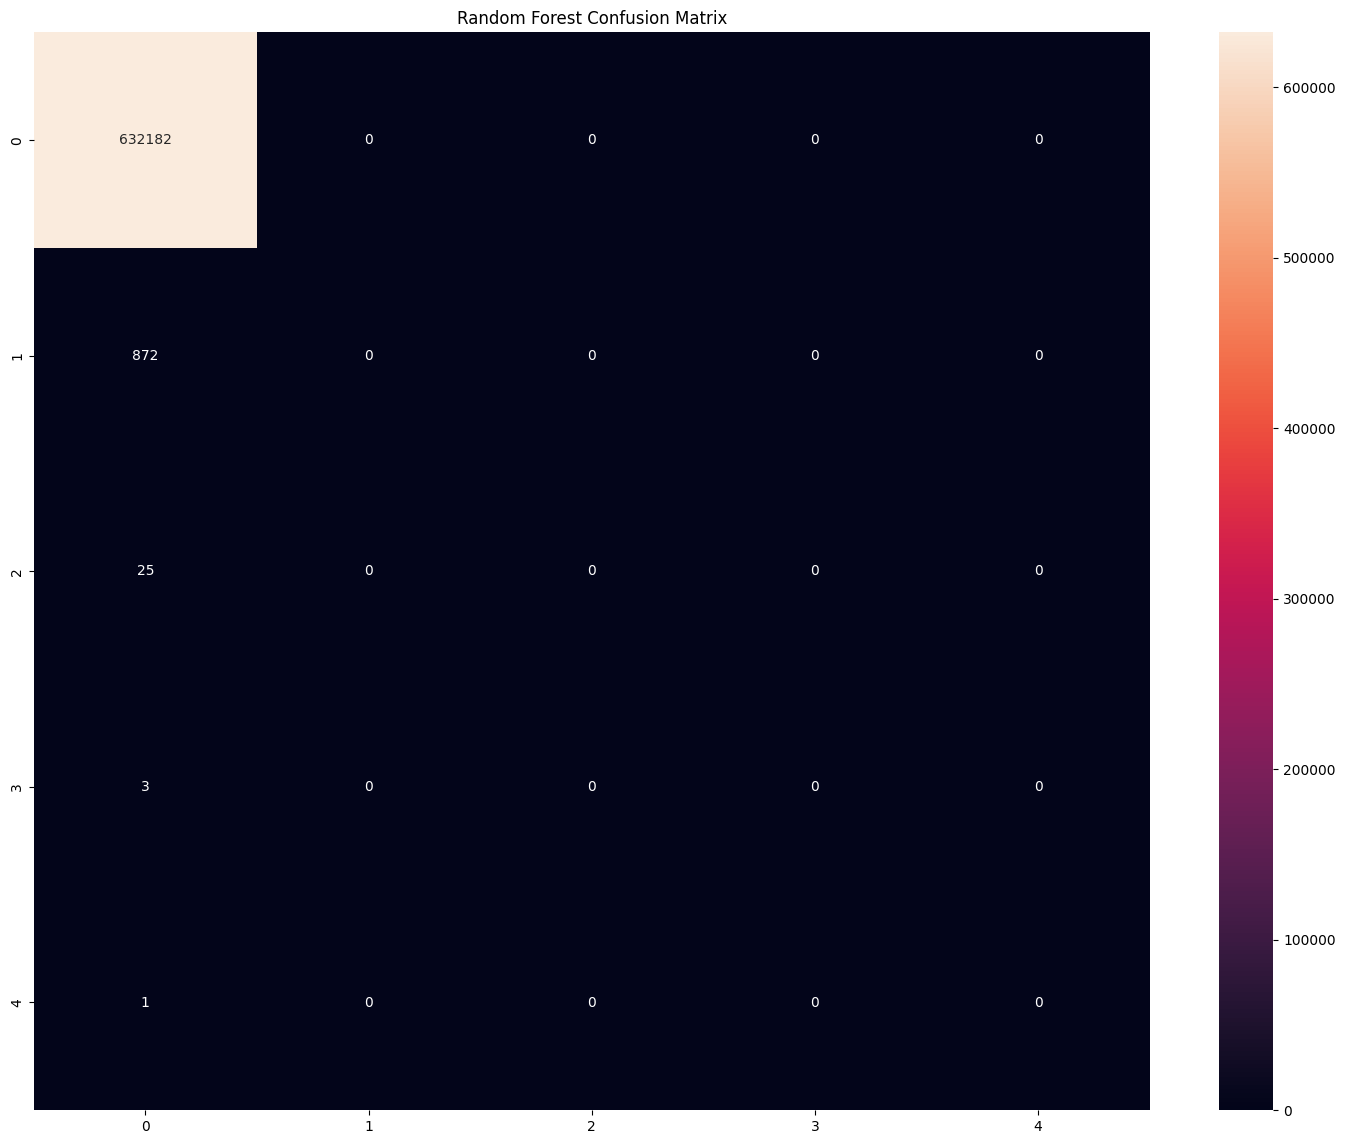

In [ ]:
#Confusion Matrix for Linear Regression
conf_matrix_lin = confusion_matrix(y_test, y_pred_lin.astype(int))
plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix_lin, annot=True, fmt='d')
plt.title('Linear Regression Confusion Matrix')
plt.show()

# Confusion Matrix for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix_log, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

The code below takes the linear regression model and calculates the mean squared error, root mean squared error, and the R^2 error.

While the MSE and RMSE values are relatively low, indicating small prediction errors, the R-squared value is very close to zero. This suggests that the linear regression model does not explain much of the variability in the number of fatalities based on the predictor variables used. This could imply that the relationship between the predictors and the response variable is not linear

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred_lin)
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 0.0016003162341035246
Root Mean Squared Error (RMSE): 0.040003952730993025
R-squared: 0.0004795652361690994


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    632182
         1.0       0.00      0.00      0.00       872
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00    633083
   macro avg       0.20      0.20      0.20    633083
weighted avg       1.00      1.00      1.00    633083

Confusion Matrix:
 [[632182      0      0      0      0]
 [   872      0      0      0      0]
 [    25      0      0      0      0]
 [     3      0      0      0      0]
 [     1      0      0      0      0]]
Accuracy: 0.9985768058848524


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    632182
         1.0       0.00      0.00      0.00       872
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00    633083
   macro avg       0.20      0.20      0.20    633083
weighted avg       1.00      1.00      1.00    633083

Confusion Matrix:
 [[632182      0      0      0      0]
 [   872      0      0      0      0]
 [    25      0      0      0      0]
 [     3      0      0      0      0]
 [     1      0      0      0      0]]
Accuracy: 0.9985768058848524


The below code shows the linear regression and logistic regression coefficients.

Year: Slight positive impact on the outcome.
Month: Small negative impact.
Hour: Highest positive impact, indicating that changes in the hour are significant in predicting the outcome.
Is_Weekend: Small positive impact.
Day_of_Week_Num: Moderate negative impact.
Time_of_Day_Num: Largest negative impact, indicating this feature significantly decreases the likelihood of the predicted outcome.

                 Coefficient
year                0.000129
month               0.000129
hour                0.000129
is_weekend          0.000129
day_of_week_num     0.000129
time_of_day_num     0.000129


<Figure size 1000x600 with 0 Axes>

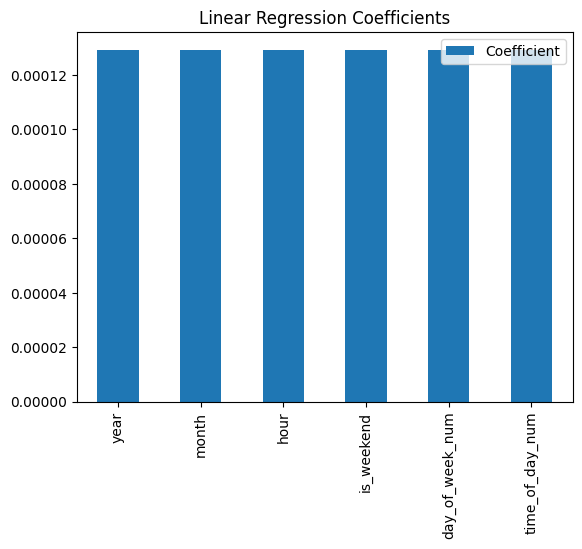

                 Coefficient
year                0.006114
month              -0.017852
hour                0.027575
is_weekend         -0.008211
day_of_week_num    -0.022175
time_of_day_num    -0.092459


<Figure size 1000x600 with 0 Axes>

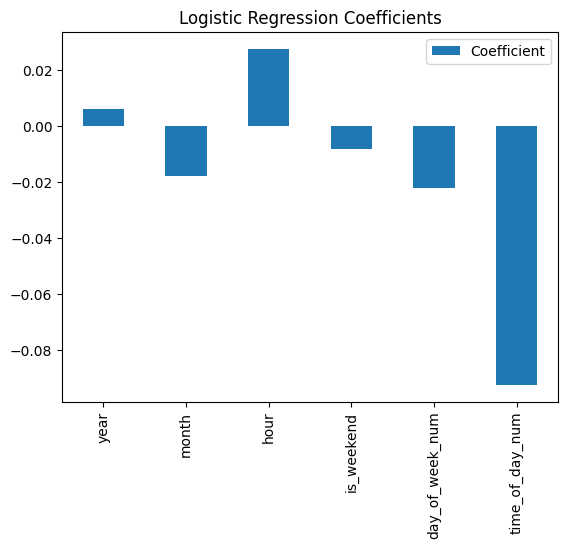

In [ ]:
# Analyze the coefficients
coefficients = pd.DataFrame(lin_reg.coef_[0], index=X.columns, columns=['Coefficient']) # Use X.columns to get the feature names
print(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Linear Regression Coefficients')
plt.show()

#Analyze the coefficients
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient']) # Use X.columns to get the feature names
print(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Logistic Regression Coefficients')
plt.show()

# Summary of Findings

Driver Inattention/Distraction: This is the most common contributing factor to crashes, accounting for a significant portion of incidents. The most driver inattention/distraction occurs in the afternooons on Friday, when most people leave from work.

High-Risk Areas: Brooklyn and Queens have the highest number of injuries and fatalities, likely due to their dense populations.

Features selected for models: Although Brooklyn and Queens have some of the most dense population sizes, the features of the time of day, year, hour, month, and day of the week have been used since they have the most affect on the number of cars congested on the road (since most people are in cars when they leave or first arrive to work), and they affect distracted driving/inattention (since people are usually tired and distracted when they come home from work).

Predictive Accuracy: The models, including Linear Regression, Logistic Regression, and Random Forest Classifier, have been effective in predicting the number of fatalities based on the various selected features of time of day, year, hour, month, and day of the week for class 0.0. However, it could have done better with classes 1.0-4.0.

Significance: These insights can help state government agencies, researchers, and transportation planners develop targeted strategies to improve traffic safety and reduce the number of vehicle collisions in urban areas. Additionally, vehicle manufacturers can use this information to enhance safety features in their vehicles, ultimately contributing to safer roads.

Feedback for city planners based on the results: Enforce stricter rules to limit distracted driving, especially during the time when people leave and go to work.

Feedback for vehicle manufacturers: Create cars that are safter for the road. People's lives matter more than the saving on costs by including less features that reduce accidents.

Future Work:

- Undersampling the majority class of 0.0 for the machine learning models to (hopefully) more accurately predict the number of deaths for all cases, based on the features provided.
- Utilize AI tools, such as Open source AI models, to predict the number of deaths from the crashes.

# References

- Bieber, C., & Ramirez, A. (2023, October 25). The cities where you’re most likely to get in a car accident. Forbes. https://www.forbes.com/advisor/legal/auto-accident/cities-most-car-accidents/

- Jones, B. (2024, November 8). What types of cars cause the most accidents?. Jones Law Group - Your Lawyers for Life. https://jlgtampabay.com/car-accident/cars-that-cause-the-most-accidents/#:~:text=Sedans%20are%20among%20the%20most,among%20sedan%20drivers%20and%20passengers.

- Moore, T., & Gollub, H. (2024, January 16). Fatal car crash statistics 2024. USA Today. https://www.usatoday.com/money/blueprint/auto-insurance/fatal-car-crash-statistics/#:~:text=There%20are%20nearly%2043%2C000%20fatal,accidents%20in%20the%20United%20States.

- Moretti, R., & Kelly, C. B. (2024, July 2). News release: New York traffic fatalities increased 15 percent over past five years... TRIP. https://tripnet.org/reports/addressing-americas-traffic-safety-crisis-new-york-news-release-07-02-2024/

- Population of NYC by borough in 2024. Metropolis Moving. (2024, February 2). https://metropolismoving.com/blog/new-york-city-population-in-2024/

- What are the odds of getting in a car crash?. Law Offices of Bryan Musgrave. (2024, June 24). https://www.bryanmusgrave.com/what-are-the-odds-of-getting-in-a-car-crash/#:~:text=The%20General%20Services%20Administration%20(GSA,car%20accidents%20in%20their%20lives.